In [1]:
import pandas as pd
import numpy as np
from vowpalwabbit import pyvw
import matplotlib.pyplot as plt
import math
import slates
%matplotlib inline

In [36]:
actions = [list(range(10)),list(range(10))]
slate_action_sets = [["x="+str(i) for i in actions[0]],["y="+str(i) for i in actions[1]]]
cb_action_set = slates.combine(actions, ["x", "y"])
print(len(cb_action_set))

slate_args = "--ccb_explore_adf --cb_type ips --power_t 0 -l 0.000001 --slate --quiet --epsilon 0.2 --interactions :: UAS"
cb_args = "--cb_explore_adf --cb_type ips --power_t 0 -l 0.000001 --quiet --epsilon 0.2 --interactions ::"

100


In [33]:
NUM_ITER = 10000
NUM_ROUNDS = 10
EXAMPLES_IN_EACH_CHECKPOINT=100

In [4]:
outcomes = dict()

In [5]:
def cost_func_slates(prediction):
    if prediction[0][0][0] == 3 and prediction[1][0][0] == 3:
        return -1
    else:
        return 1
    
def cost_func_cb(chosen_action):
    if chosen_action == "x=3 y=3":
        return -1
    else:
        return 1

# Slates

In [37]:
from collections import defaultdict

cost_dicts = defaultdict(list)
current_cost_dict = defaultdict(int)

for num in range(NUM_ROUNDS):
    print('Iter:',num)
    model = pyvw.vw(slate_args)
    slates_outcomes = []
    cost_dict = defaultdict(int)
    for i in range(1,1+NUM_ITER):
        shared_context = "constant"
        examples = slates.create_slates_example(model, shared_context, slate_action_sets)
#         print("\n".join(examples))
#         break
        pred = slates.slate_pred_conv(model.predict(examples, prediction_type=pyvw.pylibvw.vw.pDECISION_SCORES))
        model.finish_example(examples)

        # Choose the slot to sample
        chosen_slot = np.random.choice(len(pred))
        slot_to_sample = pred[chosen_slot]
        # Sample an index from this slot
        index = slates.sample_index(slot_to_sample)
        # Swap sampled action if it was not the 0th item.
        if index != 0:
            slot_to_sample[0], slot_to_sample[index] = slot_to_sample[index], slot_to_sample[0]
        # Assign the potentially modified slot back into the prediction
        pred[chosen_slot] = slot_to_sample

        cost = cost_func_slates(pred)
        x_outcome = (pred[0][0][0], cost, pred[0][0][1])
        y_outcome = (pred[0][0][0], cost, pred[1][0][1])
        if(pred[0][0][1] > 0.5 and pred[1][0][1] > 0.5):
            slates_outcomes.append((x_outcome, y_outcome))

        current_cost_dict[cost] += 1
        if i % EXAMPLES_IN_EACH_CHECKPOINT == 0:
            print(i, current_cost_dict)
            cost_dicts[i].append(current_cost_dict[-1])
            current_cost_dict = defaultdict(int)

        examples = slates.create_slates_example(model, shared_context, slate_action_sets,  [x_outcome,y_outcome])
        model.learn(examples)
        model.finish_example(examples)

outcomes[slate_args] = cost_dicts

Iter: 0
100 defaultdict(<class 'int'>, {1: 100})
200 defaultdict(<class 'int'>, {1: 100})
300 defaultdict(<class 'int'>, {1: 100})
400 defaultdict(<class 'int'>, {1: 100})
500 defaultdict(<class 'int'>, {1: 100})
600 defaultdict(<class 'int'>, {1: 100})
700 defaultdict(<class 'int'>, {1: 100})
800 defaultdict(<class 'int'>, {1: 100})
900 defaultdict(<class 'int'>, {1: 100})
1000 defaultdict(<class 'int'>, {1: 100})
1100 defaultdict(<class 'int'>, {1: 100})
1200 defaultdict(<class 'int'>, {1: 100})
1300 defaultdict(<class 'int'>, {1: 100})
1400 defaultdict(<class 'int'>, {1: 100})
1500 defaultdict(<class 'int'>, {1: 100})
1600 defaultdict(<class 'int'>, {1: 99, -1: 1})
1700 defaultdict(<class 'int'>, {1: 99, -1: 1})
1800 defaultdict(<class 'int'>, {1: 77, -1: 23})
1900 defaultdict(<class 'int'>, {1: 99, -1: 1})
2000 defaultdict(<class 'int'>, {1: 100})
2100 defaultdict(<class 'int'>, {1: 98, -1: 2})
2200 defaultdict(<class 'int'>, {1: 100})
2300 defaultdict(<class 'int'>, {1: 100})
2400

9200 defaultdict(<class 'int'>, {1: 100})
9300 defaultdict(<class 'int'>, {1: 99, -1: 1})
9400 defaultdict(<class 'int'>, {1: 99, -1: 1})
9500 defaultdict(<class 'int'>, {1: 100})
9600 defaultdict(<class 'int'>, {1: 100})
9700 defaultdict(<class 'int'>, {1: 100})
9800 defaultdict(<class 'int'>, {1: 100})
9900 defaultdict(<class 'int'>, {1: 100})
10000 defaultdict(<class 'int'>, {1: 100})
Iter: 2
100 defaultdict(<class 'int'>, {1: 100})
200 defaultdict(<class 'int'>, {1: 100})
300 defaultdict(<class 'int'>, {1: 99, -1: 1})
400 defaultdict(<class 'int'>, {1: 100})
500 defaultdict(<class 'int'>, {1: 100})
600 defaultdict(<class 'int'>, {1: 100})
700 defaultdict(<class 'int'>, {1: 100})
800 defaultdict(<class 'int'>, {1: 99, -1: 1})
900 defaultdict(<class 'int'>, {1: 99, -1: 1})
1000 defaultdict(<class 'int'>, {1: 100})
1100 defaultdict(<class 'int'>, {1: 100})
1200 defaultdict(<class 'int'>, {1: 100})
1300 defaultdict(<class 'int'>, {1: 100})
1400 defaultdict(<class 'int'>, {1: 100})
1500

8400 defaultdict(<class 'int'>, {1: 100})
8500 defaultdict(<class 'int'>, {1: 100})
8600 defaultdict(<class 'int'>, {1: 100})
8700 defaultdict(<class 'int'>, {1: 100})
8800 defaultdict(<class 'int'>, {1: 100})
8900 defaultdict(<class 'int'>, {1: 100})
9000 defaultdict(<class 'int'>, {1: 100})
9100 defaultdict(<class 'int'>, {1: 100})
9200 defaultdict(<class 'int'>, {1: 100})
9300 defaultdict(<class 'int'>, {1: 100})
9400 defaultdict(<class 'int'>, {1: 100})
9500 defaultdict(<class 'int'>, {1: 100})
9600 defaultdict(<class 'int'>, {1: 100})
9700 defaultdict(<class 'int'>, {1: 100})
9800 defaultdict(<class 'int'>, {1: 99, -1: 1})
9900 defaultdict(<class 'int'>, {1: 100})
10000 defaultdict(<class 'int'>, {1: 100})
Iter: 4
100 defaultdict(<class 'int'>, {1: 100})
200 defaultdict(<class 'int'>, {1: 100})
300 defaultdict(<class 'int'>, {1: 100})
400 defaultdict(<class 'int'>, {1: 100})
500 defaultdict(<class 'int'>, {1: 100})
600 defaultdict(<class 'int'>, {1: 100})
700 defaultdict(<class 'i

7900 defaultdict(<class 'int'>, {1: 100})
8000 defaultdict(<class 'int'>, {1: 100})
8100 defaultdict(<class 'int'>, {1: 100})
8200 defaultdict(<class 'int'>, {1: 100})
8300 defaultdict(<class 'int'>, {1: 100})
8400 defaultdict(<class 'int'>, {1: 100})
8500 defaultdict(<class 'int'>, {1: 100})
8600 defaultdict(<class 'int'>, {1: 100})
8700 defaultdict(<class 'int'>, {1: 100})
8800 defaultdict(<class 'int'>, {1: 100})
8900 defaultdict(<class 'int'>, {1: 100})
9000 defaultdict(<class 'int'>, {1: 100})
9100 defaultdict(<class 'int'>, {1: 100})
9200 defaultdict(<class 'int'>, {1: 100})
9300 defaultdict(<class 'int'>, {1: 100})
9400 defaultdict(<class 'int'>, {1: 100})
9500 defaultdict(<class 'int'>, {1: 100})
9600 defaultdict(<class 'int'>, {1: 100})
9700 defaultdict(<class 'int'>, {1: 100})
9800 defaultdict(<class 'int'>, {1: 100})
9900 defaultdict(<class 'int'>, {1: 100})
10000 defaultdict(<class 'int'>, {1: 100})
Iter: 6
100 defaultdict(<class 'int'>, {1: 95, -1: 5})
200 defaultdict(<cla

7100 defaultdict(<class 'int'>, {1: 100})
7200 defaultdict(<class 'int'>, {1: 100})
7300 defaultdict(<class 'int'>, {1: 100})
7400 defaultdict(<class 'int'>, {1: 100})
7500 defaultdict(<class 'int'>, {1: 100})
7600 defaultdict(<class 'int'>, {1: 100})
7700 defaultdict(<class 'int'>, {1: 100})
7800 defaultdict(<class 'int'>, {1: 100})
7900 defaultdict(<class 'int'>, {1: 100})
8000 defaultdict(<class 'int'>, {1: 100})
8100 defaultdict(<class 'int'>, {1: 100})
8200 defaultdict(<class 'int'>, {1: 100})
8300 defaultdict(<class 'int'>, {1: 100})
8400 defaultdict(<class 'int'>, {1: 100})
8500 defaultdict(<class 'int'>, {1: 100})
8600 defaultdict(<class 'int'>, {1: 100})
8700 defaultdict(<class 'int'>, {1: 100})
8800 defaultdict(<class 'int'>, {1: 100})
8900 defaultdict(<class 'int'>, {1: 100})
9000 defaultdict(<class 'int'>, {1: 100})
9100 defaultdict(<class 'int'>, {1: 100})
9200 defaultdict(<class 'int'>, {1: 100})
9300 defaultdict(<class 'int'>, {1: 100})
9400 defaultdict(<class 'int'>, {1

6300 defaultdict(<class 'int'>, {1: 100})
6400 defaultdict(<class 'int'>, {1: 100})
6500 defaultdict(<class 'int'>, {1: 100})
6600 defaultdict(<class 'int'>, {1: 99, -1: 1})
6700 defaultdict(<class 'int'>, {1: 100})
6800 defaultdict(<class 'int'>, {1: 99, -1: 1})
6900 defaultdict(<class 'int'>, {1: 100})
7000 defaultdict(<class 'int'>, {1: 100})
7100 defaultdict(<class 'int'>, {1: 100})
7200 defaultdict(<class 'int'>, {1: 100})
7300 defaultdict(<class 'int'>, {1: 100})
7400 defaultdict(<class 'int'>, {1: 100})
7500 defaultdict(<class 'int'>, {1: 100})
7600 defaultdict(<class 'int'>, {1: 100})
7700 defaultdict(<class 'int'>, {1: 100})
7800 defaultdict(<class 'int'>, {1: 100})
7900 defaultdict(<class 'int'>, {1: 100})
8000 defaultdict(<class 'int'>, {1: 100})
8100 defaultdict(<class 'int'>, {1: 100})
8200 defaultdict(<class 'int'>, {1: 99, -1: 1})
8300 defaultdict(<class 'int'>, {1: 100})
8400 defaultdict(<class 'int'>, {1: 99, -1: 1})
8500 defaultdict(<class 'int'>, {1: 100})
8600 defau

# Combinatorial CB

In [34]:
from collections import defaultdict

cost_dicts = defaultdict(list)
current_cost_dict = defaultdict(int)

for num in range(NUM_ROUNDS):
    
    print('Iter:',num)
    cb_model = pyvw.vw(cb_args)
    # --interactions UUU AAA UUA AAU UUUA UUUAA UUUAAA"

    cb_outcomes = []
    current_cost_dict = defaultdict(int)

    for i in range(1,1 + NUM_ITER):
        shared_context = "constant"
        examples = slates.create_cb_example(cb_model, shared_context, cb_action_set)   
        pred = cb_model.predict(examples, prediction_type=pyvw.pylibvw.vw.pACTION_SCORES)
        cb_model.finish_example(examples)

        # Sample
        chosen_action_index = np.random.choice(len(pred), p=slates.normalize(pred))
        cost = cost_func_cb(cb_action_set[chosen_action_index])
        chosen_pred = pred[chosen_action_index]

        outcome = (chosen_action_index, cost, chosen_pred)
        current_cost_dict[cost] += 1
        if(chosen_pred > 0.5):
            cb_outcomes.append(outcome)
        if i % EXAMPLES_IN_EACH_CHECKPOINT == 0:
            print(i, current_cost_dict)
            cost_dicts[i].append(current_cost_dict[-1])
            current_cost_dict = defaultdict(int)       
                        
        examples = slates.create_cb_example(cb_model, shared_context, cb_action_set, outcome=outcome)
        cb_model.learn(examples)
        cb_model.finish_example(examples)
outcomes[cb_args] = cost_dicts

Iter: 0
100 defaultdict(<class 'int'>, {1: 91, -1: 9})
200 defaultdict(<class 'int'>, {1: 100})
300 defaultdict(<class 'int'>, {1: 100})
400 defaultdict(<class 'int'>, {1: 98, -1: 2})
500 defaultdict(<class 'int'>, {1: 84, -1: 16})
600 defaultdict(<class 'int'>, {1: 99, -1: 1})
700 defaultdict(<class 'int'>, {1: 38, -1: 62})
800 defaultdict(<class 'int'>, {-1: 79, 1: 21})
900 defaultdict(<class 'int'>, {-1: 76, 1: 24})
1000 defaultdict(<class 'int'>, {-1: 85, 1: 15})
1100 defaultdict(<class 'int'>, {-1: 75, 1: 25})
1200 defaultdict(<class 'int'>, {-1: 71, 1: 29})
1300 defaultdict(<class 'int'>, {-1: 77, 1: 23})
1400 defaultdict(<class 'int'>, {-1: 79, 1: 21})
1500 defaultdict(<class 'int'>, {-1: 81, 1: 19})
1600 defaultdict(<class 'int'>, {-1: 85, 1: 15})
1700 defaultdict(<class 'int'>, {-1: 79, 1: 21})
1800 defaultdict(<class 'int'>, {-1: 77, 1: 23})
1900 defaultdict(<class 'int'>, {-1: 60, 1: 40})
2000 defaultdict(<class 'int'>, {-1: 81, 1: 19})
2100 defaultdict(<class 'int'>, {-1: 7

7500 defaultdict(<class 'int'>, {1: 16, -1: 84})
7600 defaultdict(<class 'int'>, {-1: 76, 1: 24})
7700 defaultdict(<class 'int'>, {-1: 82, 1: 18})
7800 defaultdict(<class 'int'>, {-1: 81, 1: 19})
7900 defaultdict(<class 'int'>, {-1: 81, 1: 19})
8000 defaultdict(<class 'int'>, {-1: 79, 1: 21})
8100 defaultdict(<class 'int'>, {-1: 81, 1: 19})
8200 defaultdict(<class 'int'>, {-1: 77, 1: 23})
8300 defaultdict(<class 'int'>, {1: 25, -1: 75})
8400 defaultdict(<class 'int'>, {-1: 74, 1: 26})
8500 defaultdict(<class 'int'>, {-1: 82, 1: 18})
8600 defaultdict(<class 'int'>, {-1: 82, 1: 18})
8700 defaultdict(<class 'int'>, {-1: 81, 1: 19})
8800 defaultdict(<class 'int'>, {-1: 82, 1: 18})
8900 defaultdict(<class 'int'>, {1: 22, -1: 78})
9000 defaultdict(<class 'int'>, {-1: 78, 1: 22})
9100 defaultdict(<class 'int'>, {-1: 77, 1: 23})
9200 defaultdict(<class 'int'>, {-1: 84, 1: 16})
9300 defaultdict(<class 'int'>, {1: 21, -1: 79})
9400 defaultdict(<class 'int'>, {-1: 83, 1: 17})
9500 defaultdict(<cl

5800 defaultdict(<class 'int'>, {1: 99, -1: 1})
5900 defaultdict(<class 'int'>, {1: 100})
6000 defaultdict(<class 'int'>, {1: 100})
6100 defaultdict(<class 'int'>, {1: 100})
6200 defaultdict(<class 'int'>, {1: 100})
6300 defaultdict(<class 'int'>, {1: 99, -1: 1})
6400 defaultdict(<class 'int'>, {1: 100})
6500 defaultdict(<class 'int'>, {1: 31, -1: 69})
6600 defaultdict(<class 'int'>, {-1: 79, 1: 21})
6700 defaultdict(<class 'int'>, {-1: 76, 1: 24})
6800 defaultdict(<class 'int'>, {-1: 68, 1: 32})
6900 defaultdict(<class 'int'>, {-1: 82, 1: 18})
7000 defaultdict(<class 'int'>, {1: 23, -1: 77})
7100 defaultdict(<class 'int'>, {1: 17, -1: 83})
7200 defaultdict(<class 'int'>, {-1: 88, 1: 12})
7300 defaultdict(<class 'int'>, {-1: 78, 1: 22})
7400 defaultdict(<class 'int'>, {-1: 75, 1: 25})
7500 defaultdict(<class 'int'>, {-1: 79, 1: 21})
7600 defaultdict(<class 'int'>, {-1: 73, 1: 27})
7700 defaultdict(<class 'int'>, {-1: 79, 1: 21})
7800 defaultdict(<class 'int'>, {-1: 77, 1: 23})
7900 def

3400 defaultdict(<class 'int'>, {1: 100})
3500 defaultdict(<class 'int'>, {1: 98, -1: 2})
3600 defaultdict(<class 'int'>, {1: 100})
3700 defaultdict(<class 'int'>, {1: 100})
3800 defaultdict(<class 'int'>, {1: 100})
3900 defaultdict(<class 'int'>, {1: 100})
4000 defaultdict(<class 'int'>, {1: 100})
4100 defaultdict(<class 'int'>, {1: 99, -1: 1})
4200 defaultdict(<class 'int'>, {1: 100})
4300 defaultdict(<class 'int'>, {1: 100})
4400 defaultdict(<class 'int'>, {1: 100})
4500 defaultdict(<class 'int'>, {1: 77, -1: 23})
4600 defaultdict(<class 'int'>, {1: 24, -1: 76})
4700 defaultdict(<class 'int'>, {1: 18, -1: 82})
4800 defaultdict(<class 'int'>, {-1: 82, 1: 18})
4900 defaultdict(<class 'int'>, {1: 16, -1: 84})
5000 defaultdict(<class 'int'>, {1: 20, -1: 80})
5100 defaultdict(<class 'int'>, {-1: 87, 1: 13})
5200 defaultdict(<class 'int'>, {-1: 83, 1: 17})
5300 defaultdict(<class 'int'>, {-1: 81, 1: 19})
5400 defaultdict(<class 'int'>, {1: 20, -1: 80})
5500 defaultdict(<class 'int'>, {-1:

1300 defaultdict(<class 'int'>, {1: 99, -1: 1})
1400 defaultdict(<class 'int'>, {1: 100})
1500 defaultdict(<class 'int'>, {1: 100})
1600 defaultdict(<class 'int'>, {1: 100})
1700 defaultdict(<class 'int'>, {1: 99, -1: 1})
1800 defaultdict(<class 'int'>, {1: 100})
1900 defaultdict(<class 'int'>, {1: 100})
2000 defaultdict(<class 'int'>, {1: 100})
2100 defaultdict(<class 'int'>, {1: 100})
2200 defaultdict(<class 'int'>, {1: 99, -1: 1})
2300 defaultdict(<class 'int'>, {1: 100})
2400 defaultdict(<class 'int'>, {1: 100})
2500 defaultdict(<class 'int'>, {1: 100})
2600 defaultdict(<class 'int'>, {1: 86, -1: 14})
2700 defaultdict(<class 'int'>, {-1: 85, 1: 15})
2800 defaultdict(<class 'int'>, {1: 50, -1: 50})
2900 defaultdict(<class 'int'>, {-1: 24, 1: 76})
3000 defaultdict(<class 'int'>, {1: 98, -1: 2})
3100 defaultdict(<class 'int'>, {1: 100})
3200 defaultdict(<class 'int'>, {1: 100})
3300 defaultdict(<class 'int'>, {1: 48, -1: 52})
3400 defaultdict(<class 'int'>, {1: 57, -1: 43})
3500 defau

8700 defaultdict(<class 'int'>, {1: 100})
8800 defaultdict(<class 'int'>, {1: 100})
8900 defaultdict(<class 'int'>, {1: 100})
9000 defaultdict(<class 'int'>, {1: 100})
9100 defaultdict(<class 'int'>, {1: 100})
9200 defaultdict(<class 'int'>, {1: 100})
9300 defaultdict(<class 'int'>, {1: 100})
9400 defaultdict(<class 'int'>, {1: 99, -1: 1})
9500 defaultdict(<class 'int'>, {1: 100})
9600 defaultdict(<class 'int'>, {1: 99, -1: 1})
9700 defaultdict(<class 'int'>, {1: 100})
9800 defaultdict(<class 'int'>, {1: 100})
9900 defaultdict(<class 'int'>, {1: 100})
10000 defaultdict(<class 'int'>, {1: 100})
Iter: 9
100 defaultdict(<class 'int'>, {1: 100})
200 defaultdict(<class 'int'>, {1: 100})
300 defaultdict(<class 'int'>, {1: 39, -1: 61})
400 defaultdict(<class 'int'>, {-1: 44, 1: 56})
500 defaultdict(<class 'int'>, {1: 100})
600 defaultdict(<class 'int'>, {1: 100})
700 defaultdict(<class 'int'>, {1: 100})
800 defaultdict(<class 'int'>, {1: 100})
900 defaultdict(<class 'int'>, {1: 100})
1000 def

In [ ]:
plt.figure(figsize=(20, 8))
number_of_samples = max(len(cb_outcomes), len(slates_outcomes))
plt.plot(pd.Series([cost for ((idx,cost,prob),(_,_,_)) in slates_outcomes]).rolling(100, min_periods=0).mean(), label="slate")
plt.plot(pd.Series([cost for (idx,cost,prob) in cb_outcomes]).rolling(100, min_periods=0).mean(), label="combinatorial")

plt.ylabel("Cost")
# Plot optimal policy by sampling optimal policy number_of_samples times
optimal_policy_results = [-1 for i in range(number_of_samples)]
plt.plot(pd.Series(optimal_policy_results).rolling(5, min_periods=0).mean(), color='b', linestyle=':', label="best")

plt.legend(loc="upper right")
plt.show()

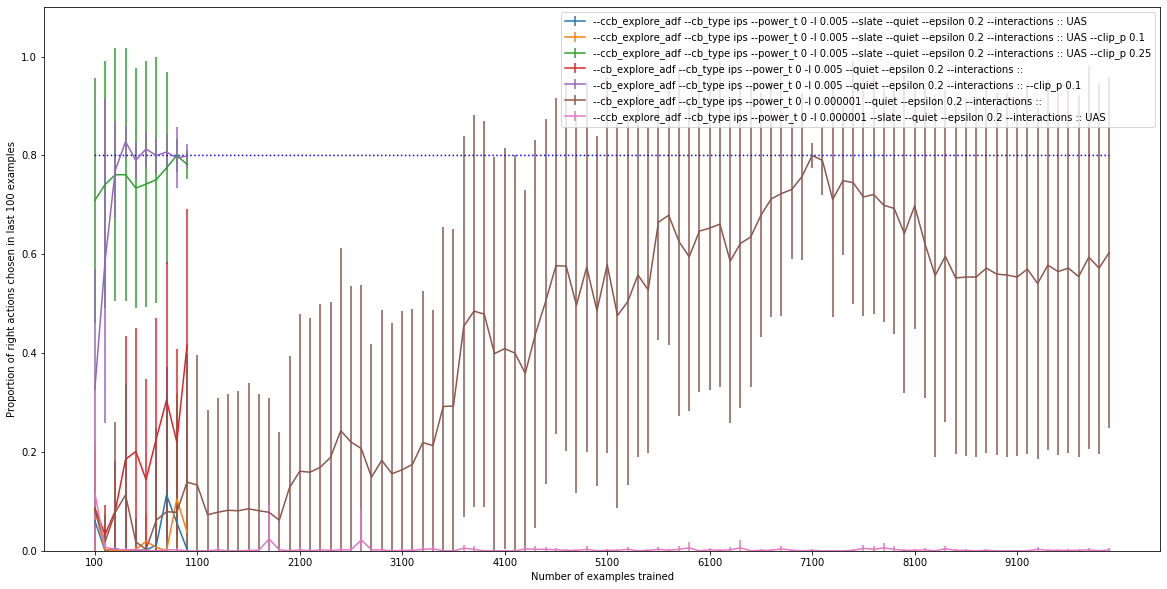

In [39]:
plt.figure(figsize=(20, 10))
for args,results in outcomes.items():
    x = [x for x, y_list in results.items()]
    y = [np.average(y_list)/EXAMPLES_IN_EACH_CHECKPOINT for x, y_list in results.items()]
    error = [np.std(y_list)/EXAMPLES_IN_EACH_CHECKPOINT for x, y_list in results.items()]
    
    plt.ylim(top=1.1)

    plt.errorbar(x=x,y=y,yerr=error,label=args)
    plt.xticks(np.arange(min(x), max(x)+1, EXAMPLES_IN_EACH_CHECKPOINT*10))
   
plt.plot(list(range(100,10000)),[0.8 for i in range(100,10000)], color='b', linestyle=':')
plt.legend(loc="upper right")
plt.ylabel("Proportion of right actions chosen in last {} examples".format(EXAMPLES_IN_EACH_CHECKPOINT))
plt.xlabel("Number of examples trained")
plt.savefig('plot.svg', bbox_inches='tight')
plt.show()

<Figure size 432x288 with 0 Axes>